# Parte 01

## Importando as bibliotecas necessárias

In [71]:
import pandas as pd #usado para obter os dados em um dataset
from sklearn.model_selection import train_test_split #usado para dividir o dataset para o treino
from sklearn.ensemble import RandomForestClassifier #usado para definir quais dimensões são importantes
from sklearn.dummy import DummyClassifier #usado para setar o baseline
from numpy import random #definir a aleatoriedade

## Tratamento dos dados

Importando e visualizando os dados

In [72]:
dados = "dados.csv"
resultados_exames = pd.read_csv('dados.csv')
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


Identificando dados faltantes

In [ ]:
resultados_exames.isnull().sum()

Removendo a tabela 33

In [57]:
valores_exames_v1 = resultados_exames.drop(columns=['exame_33'])
valores_exames_v1.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


Setando o valor aleatório

In [10]:
seed = 123143
random.seed(seed)

Separando o dataset em treino e teste

In [13]:
valores_exames = valores_exames_v1.drop(columns=['id','diagnostico'])
diagnostico = valores_exames_v1['diagnostico']

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico, test_size = 0.3)

## Baseline

Treinando a baseline

In [73]:
baseline = DummyClassifier(strategy="most_frequent")
baseline.fit(treino_x,treino_y)

DummyClassifier(strategy='most_frequent')

Imprimindo o resultado

In [74]:
resultado = baseline.score(teste_x, teste_y) * 100
print(f'resultado da classificação de base: {resultado:.2f}%')

resultado da classificação de base: 59.65%


## Random Forest

Treinando o classificador com 100 níveis de profundidade

In [75]:
classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x,treino_y)

RandomForestClassifier()

Mostrando o resultado

In [76]:
resultado = classificador.score(teste_x, teste_y) * 100
print(f'resultado da classificação do Random Forest: {resultado:.2f}%')

resultado da classificação do Random Forest: 94.74%


# Parte 02

## Importando bibliotecas

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Ajuste do Dataset para Visualização

Organizando a escala

In [55]:
padronizador = StandardScaler() #iniciando o padronizador
padronizador.fit(valores_exames) #Definindo a escala
valores_exames_v2 = padronizador.transform(valores_exames) #ajustando os dados, retorna um array numpy
valores_exames_v2

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

Reorganizando os dados em um dataset Pandas

In [58]:
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2,columns=valores_exames.keys())
valores_exames_v2.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,1.421085e-14,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,1.110223e-16,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.421085e-14,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.110223e-16,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.421085e-14,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.110223e-16,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,1.421085e-14,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,1.110223e-16,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.421085e-14,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,1.110223e-16,0.729259,-0.868353,-0.397100


Organizando o dataset para plotagem

In [59]:
dados_plot = pd.concat([diagnostico,valores_exames_v2.iloc[:,0:10]],axis=1) #unindo os dados
dados_plot = pd.melt(dados_plot, id_vars="diagnostico",var_name="exames", value_name ="valores") #reduzindo o tamanho do dataset
dados_plot.head() #visualizando

,diagnostico,exames,valores
0,M,exame_1,1.097064
1,M,exame_1,1.829821
2,M,exame_1,1.579888
3,M,exame_1,-0.768909
4,M,exame_1,1.750297


## Visualização

## Avaliando os exames

definindo a função de plot

In [61]:
def grafico_violino(valores, inicio, fim):
    dados_plot = pd.concat([diagnostico,valores_exames_v2.iloc[:,inicio:fim]],axis=1) #unindo os dados
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico",var_name="exames", value_name ="valores") #reduzindo o tamanho do dataset
    dados_plot.head() #visualizando
    plt.figure(figsize=(10,10)) #definindo o tamanho da figura
    sns.violinplot(x = "exames", y = "valores", hue="diagnostico", data = dados_plot, split=True) #gerando o plot
    plt.xticks(rotation = 90) #rotacionando o label do eixo X

Plotando os gráficos

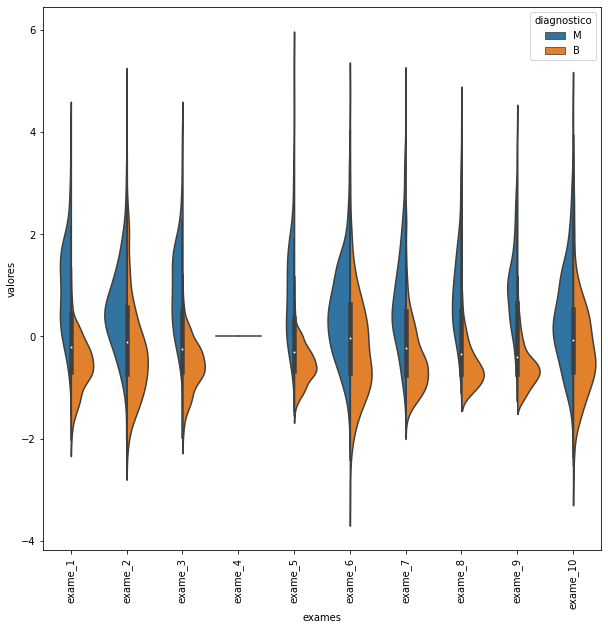

In [65]:
grafico_violino(valores_exames_v2, 0, 10)

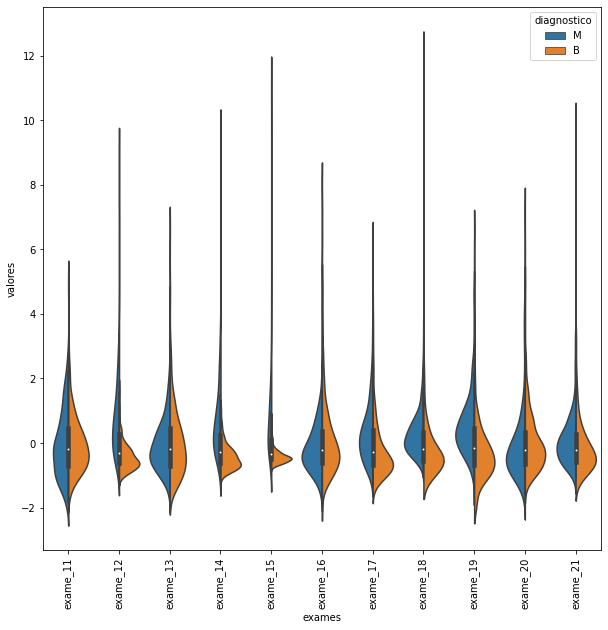

In [62]:
grafico_violino(valores_exames_v2, 10, 21)

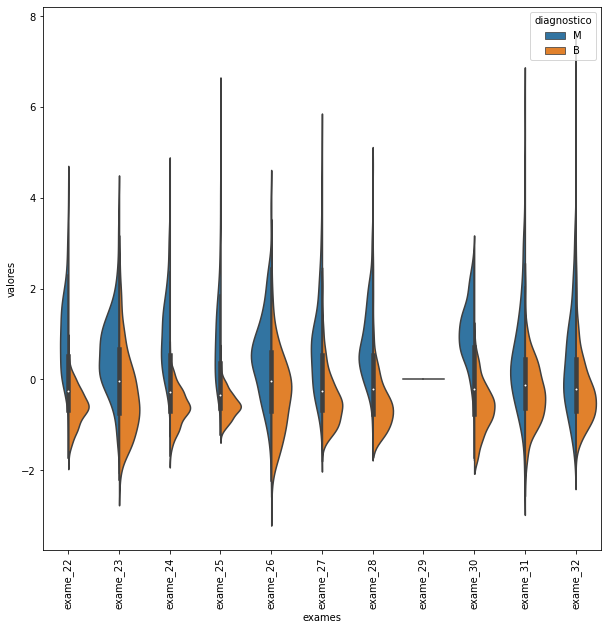

In [63]:
grafico_violino(valores_exames_v2, 21, 32)

As cristas mostram onde estão os valores mais prevalentes para tumores malignos e benignos.

Aqueles que possuem cristas em pontos diferentes servem como bons indicadores para identificar se o tumor é benigno ou maligno. O inverso também se aplica, cristas próximas identificam indicadores pouco expressivos.

É possível avaliar que há duas variáveis, `exame_4` e `exame_29`, que são constantes, não fornecendo quaisquer benefício para o dataset

## Limpando os Dados

Definindo a função para classificação mais rápido

In [68]:
def classificar(valores):
    seed = 123143
    random.seed(seed)
    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size = 0.3)
    classificador = RandomForestClassifier(n_estimators=100)
    classificador.fit(treino_x,treino_y)
    resultado = classificador.score(teste_x, teste_y) * 100
    print(f'resultado da classificação do Random Forest: {resultado:.2f}%')
    
    

Removendo os dados ruins

In [69]:
valores_exames_v3 = valores_exames_v2.drop(columns=['exame_4','exame_29'])

In [70]:
classificar(valores_exames_v3)

resultado da classificação do Random Forest: 91.81%


# Parte 03

Montando o mapa de correlação

<AxesSubplot:>

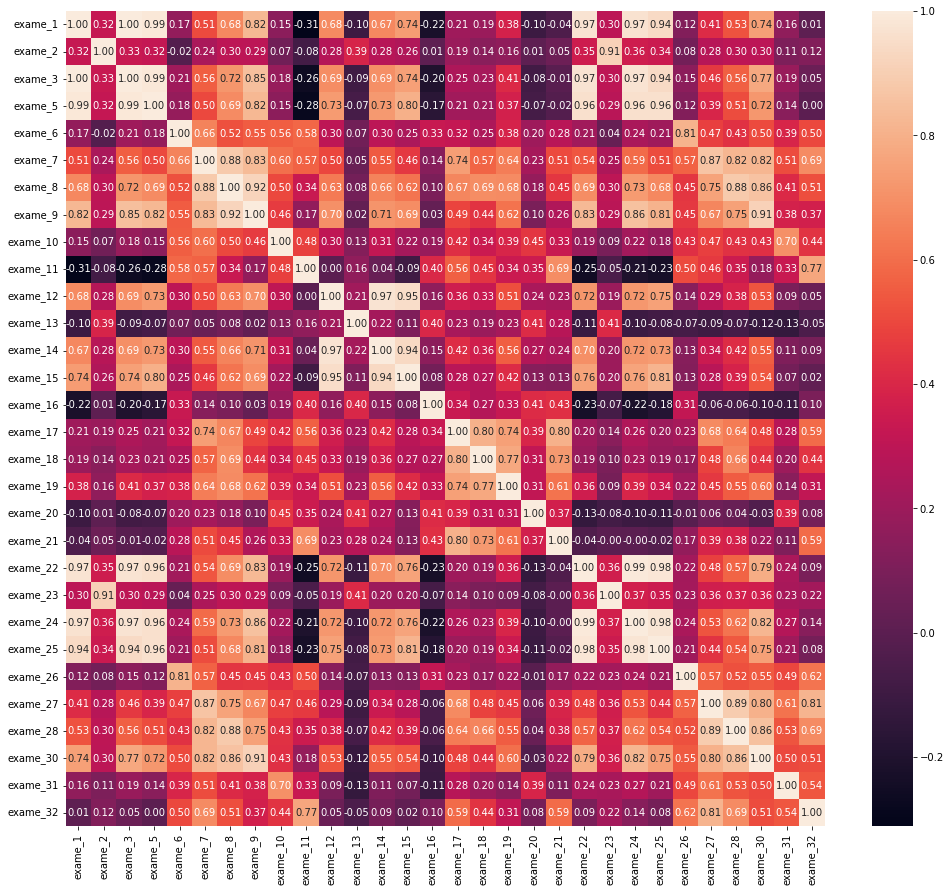

In [82]:
correlacao = valores_exames_v3.corr()
plt.figure(figsize=(17,15))
sns.heatmap(correlacao, annot = True, fmt = ".2f")

Identificando quais variáveis são altamente correlacionadas

In [101]:
correlacao_v1 = correlacao[correlacao>0.99] #separando os valores com alta correlação

In [102]:
correlacao_v2 = correlacao_v1.sum() #identificando as variáveis fortemente correlacionadas

In [106]:
correlacao_v3 = correlacao_v2[correlacao_v2>1] #filtrando as variáveis para obter somente as altamente correlacionadas
correlacao_v3

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [109]:
valores_exames_v4 = valores_exames_v3.drop(columns=['exame_3','exame_24'])
valores_exames_v4.head()

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [110]:
classificar(valores_exames_v4)

resultado da classificação do Random Forest: 92.98%


Removendo as variáveis altamente correlacionadas, reduzimos a dimensionalidade do treinamento

# Parte 04

## Importar biblioteca

In [138]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE 
from sklearn.metrics import confusion_matrix

## Selecionar melhores padrões

Ajustando o dataset para usar com a função de fitting chiquadrado

In [123]:
valores_exames_v5 = valores_exames.drop(columns = ['exame_3','exame_4','exame_29','exame_24'])

In [124]:
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v5, diagnostico, test_size = 0.3)

Treinando o KBest

In [126]:
kmelhores = SelectKBest(chi2, k = 5)

kmelhores.fit(treino_x,treino_y)
treino_kmelhores = kmelhores.transform(treino_x)
teste_kmelhores = kmelhores.transform(teste_x)

In [128]:
treino_kmelhores.shape

(398, 5)

Testando a seleção de dimensões

In [129]:
classificador = RandomForestClassifier(n_estimators=100,random_state=1234)
classificador.fit(treino_kmelhores,treino_y)

resultado = classificador.score(teste_kmelhores,teste_y) * 100
print(f"Resultado da classificação com KBest: {resultado:.2f}%")

Resultado da classificação com KBest: 94.74%


## Matriz de Confusão

In [133]:
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kmelhores))
matriz_confusao

array([[110,   2],
       [  7,  52]], dtype=int64)

[Text(0.5, 48.5, 'Predição'), Text(66.5, 0.5, 'Real')]

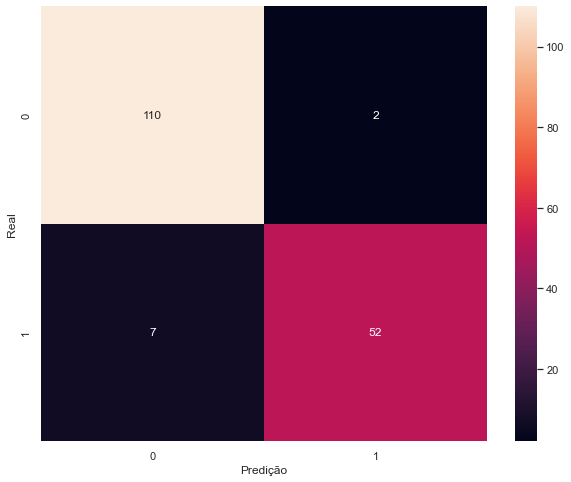

In [137]:
plt.figure(figsize = (10,8))
sns.set()
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel="Predição",ylabel="Real")

## RFE

In [144]:
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v5, diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100,random_state=1234)
classificador.fit(treino_x,treino_y)

selecionar_rfe = RFE(estimator=classificador, n_features_to_select=5, step=1)
selecionar_rfe.fit(treino_x,treino_y)
treino_rfe = selecionar_rfe.transform(treino_x)
teste_rfe = selecionar_rfe.transform(teste_x)
classificador.fit(treino_rfe,treino_y)

RandomForestClassifier(random_state=1234)

Resultado do classificador RFE: 95.91


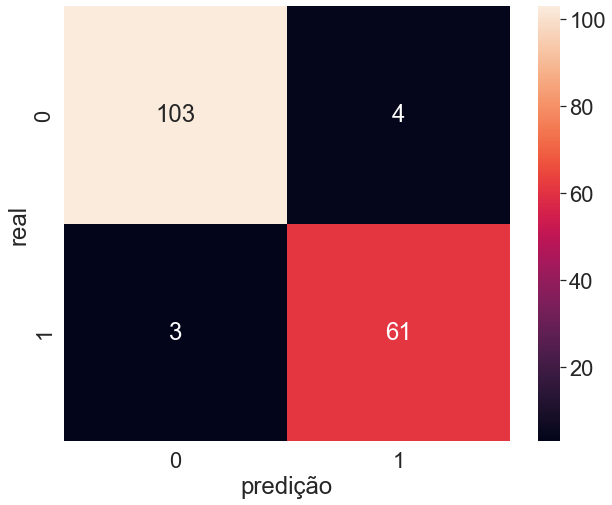

In [145]:
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel="predição",ylabel="real")
resultado = classificador.score(teste_rfe, teste_y)*100
print(f"Resultado do classificador RFE: {resultado:.2f}")

# Parte 05

## Importando bibliotecas

In [166]:
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## Visualizando a matriz de confusão usando o feature selection

C:\Users\Natha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


Resultado do classificador RFE: 92.98


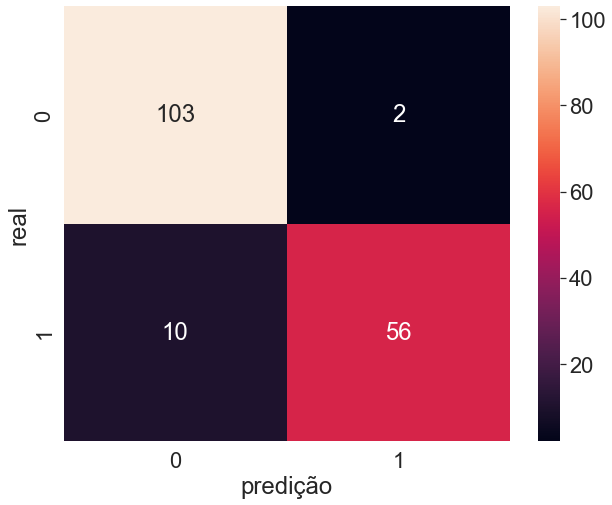

In [161]:
seed = 1234
random.seed(seed)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v5, diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100,random_state=1234)
classificador.fit(treino_x,treino_y)

selecionar_rfecv = RFECV(estimator=classificador, cv=5, step=1, scoring="accuracy")
selecionar_rfecv.fit(treino_x,treino_y)
treino_rfecv = selecionar_rfecv.transform(treino_x)
teste_rfecv = selecionar_rfecv.transform(teste_x)
classificador.fit(treino_rfecv,treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel="predição",ylabel="real")
resultado = classificador.score(teste_rfecv, teste_y)*100
print(f"Resultado do classificador RFE: {resultado:.2f}")

In [148]:
treino_x.columns[selecionar_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

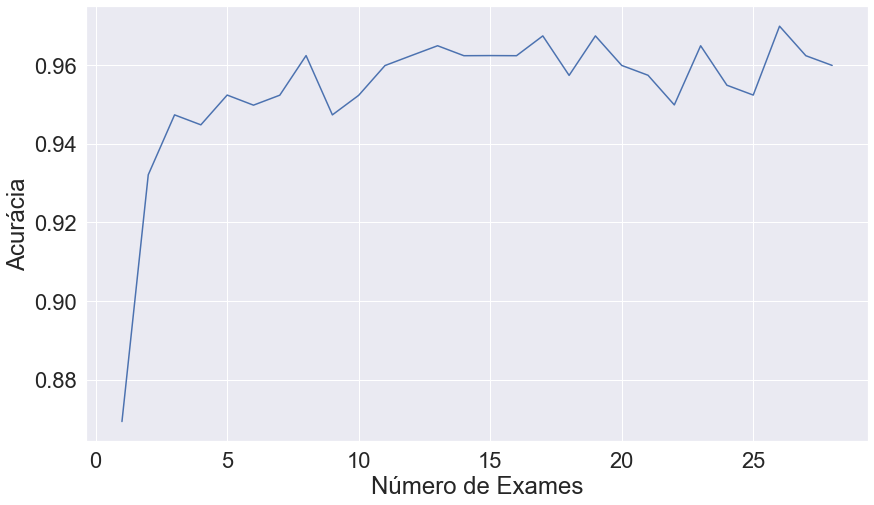

In [158]:


plt.figure(figsize=(14,8))
plt.xlabel("Número de Exames")
plt.ylabel("Acurácia")

plt.plot(range(1,len(selecionar_rfecv.cv_results_['mean_test_score'])+1), selecionar_rfecv.cv_results_['mean_test_score'])
plt.show()

In [159]:
valores_exames_v6 = selecionar_rfe.transform(valores_exames_v5)
valores_exames_v6

array([[3.001e-01, 1.471e-01, 2.538e+01, 2.019e+03, 2.654e-01],
       [8.690e-02, 7.017e-02, 2.499e+01, 1.956e+03, 1.860e-01],
       [1.974e-01, 1.279e-01, 2.357e+01, 1.709e+03, 2.430e-01],
       ...,
       [9.251e-02, 5.302e-02, 1.898e+01, 1.124e+03, 1.418e-01],
       [3.514e-01, 1.520e-01, 2.574e+01, 1.821e+03, 2.650e-01],
       [0.000e+00, 0.000e+00, 9.456e+00, 2.686e+02, 0.000e+00]])

<AxesSubplot:>

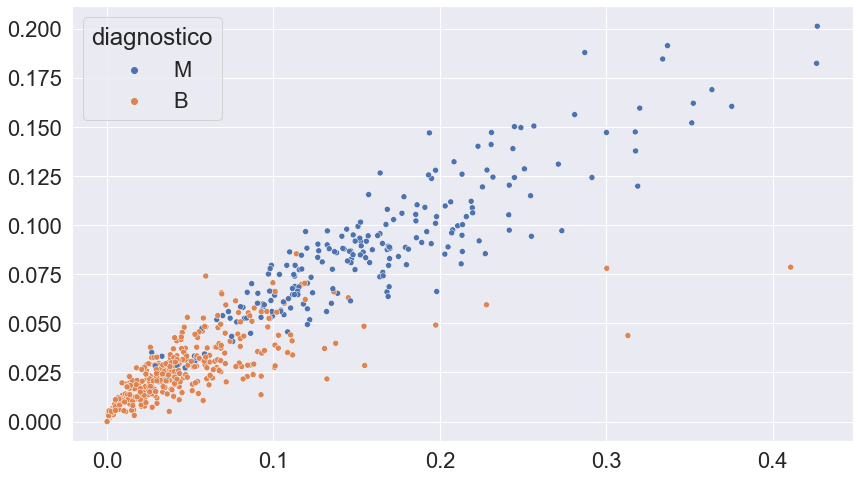

In [160]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v6[:,0],y=valores_exames_v6[:,1],hue=diagnostico)

In [164]:
pca = PCA(n_components=2)
valores_exames_v7 = pca.fit_transform(valores_exames_v4)
valores_exames_v7

array([[ 8.96150504,  1.20129074],
       [ 1.44812702, -3.54148885],
       [ 5.24751143, -1.46792042],
       ...,
       [ 0.87829285, -1.93369918],
       [10.0242535 ,  0.84654838],
       [-5.04091294, -0.5352433 ]])

<AxesSubplot:>

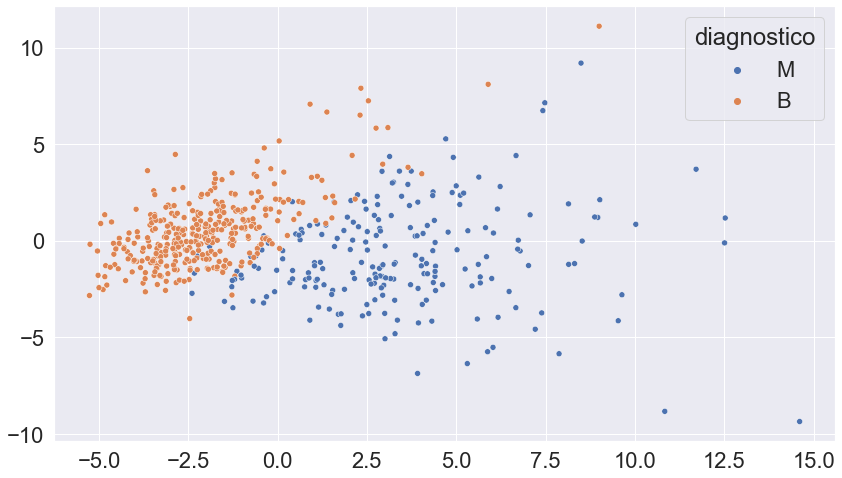

In [165]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v7[:,0],y=valores_exames_v7[:,1],hue=diagnostico)

C:\Users\Natha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Natha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:>

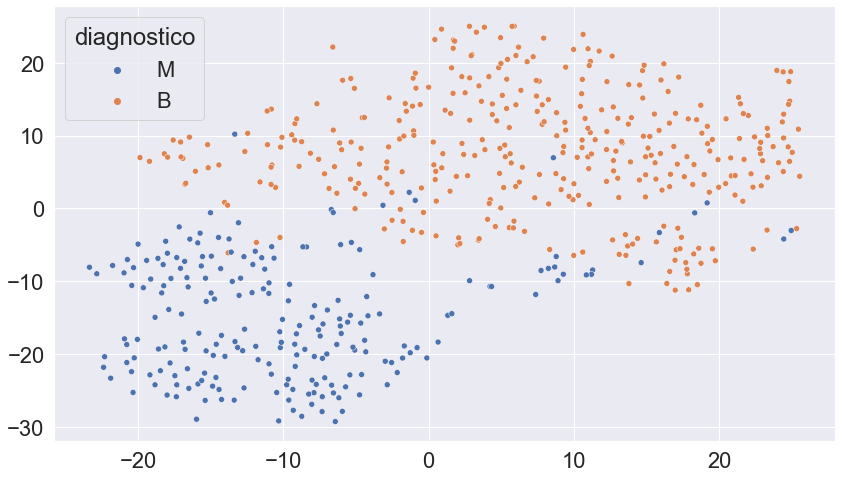

In [167]:
tsne = TSNE(n_components=2)
valores_exames_v8 = tsne.fit_transform(valores_exames_v4)
plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v8[:,0],y=valores_exames_v8[:,1],hue=diagnostico)